In [ ]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import joblib
import imodelsx.process_results
import sys
sys.path.append('../experiments/')
results_dir = '../results/kan_may6'
experiment_filename = '../experiments/04_kan.py'

# load the results in to a pandas dataframe
r = imodelsx.process_results.get_results_df(results_dir)
cols_varied = imodelsx.process_results.get_experiment_keys(
    r, experiment_filename)
print('experiment varied these params:', cols_varied)
r = imodelsx.process_results.fill_missing_args_with_default(
    r, experiment_filename)

# get the breakdown of data in these groups
r.groupby(cols_varied).size()

In [ ]:
r

In [ ]:
# group using these experiment hyperparams when averaging over random seeds
ravg = imodelsx.process_results.average_over_seeds(
    r, experiment_filename, key_to_average_over='seed'
)

# apply cross validation
ravg_cv = (
    ravg
    .sort_values(by='corr_tune', ascending=False)
    .groupby(by=['model_type', 'dataset_name'])
    .first()
    .reset_index()
)
ravg_cv

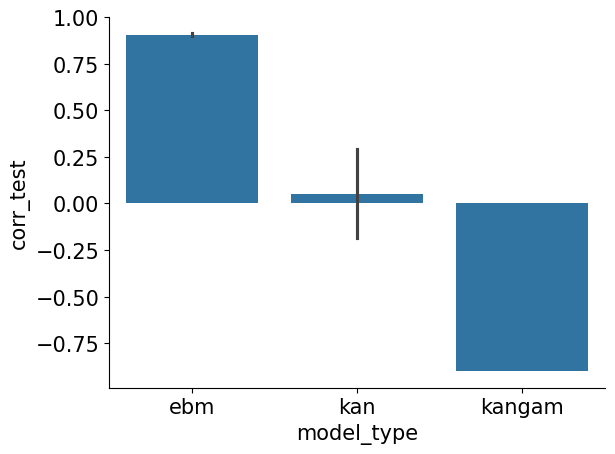

In [8]:
# , hue='dataset_name')
sns.barplot(data=ravg_cv, x='model_type', y='corr_test')
plt.show()

In [10]:
# dataset breakdown
ravg_cv.pivot_table(index=['dataset_name'], values=[
                    'corr_test'], columns=['model_type'])

corr_test                    
model_type                    ebm       kan    kangam
dataset_name                                         
1027_ESL                 0.911890       NaN       NaN
1096_FacultySalaries          NaN  0.225075 -0.897459
485_analcatdata_vehicle       NaN  0.124564       NaN
505_tecator                   NaN  0.486776       NaN
556_analcatdata_apnea2        NaN -0.128866       NaN
557_analcatdata_apnea1        NaN -0.242206       NaN
561_cpu                       NaN -0.593435       NaN
687_sleuth_ex1605             NaN  0.497951       NaN
695_chatfield_4          0.897463       NaN       NaN
712_chscase_geyser1           NaN  0.051793       NaN

Load an individual model

In [ ]:
run_args = r.iloc[0]
model = joblib.load(join(run_args.save_dir_unique, 'model.pkl'))
model